### 경고문구 무시

In [156]:
import warnings
warnings.filterwarnings('ignore')

### 실습용 데이터 'Default.csv' 여부 확인 

In [157]:
!ls -l

total 296
-rw-r--r-- 1 root root 296176 Aug 19 07:52 Default.csv
drwxr-xr-x 1 root root   4096 Jul 30 16:30 sample_data


### Pandas를 이용하여 Default.csv의 데이터 확인하기

In [158]:
import pandas as pd

DF = pd.read_csv('Default.csv')
DF.info()
DF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


# 1. 탐색적 데이터 분석

  ## 1) Default 값의 빈도 분석

In [159]:
DF.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

  ## 2) 데이터 분포 시각화

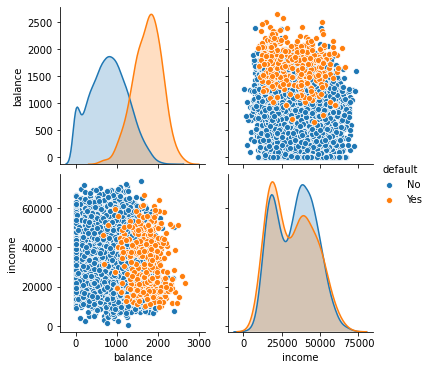

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(hue = 'default', data = DF)
plt.show()

DF.head()

# 2. Data Processing

## 1) Student의 문자형 데이터를 숫자형 데이터로 변환하기

In [161]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(DF['student'])
VT = encoder.transform(DF['student'])
VT = VT.reshape(-1,)
DF['student'] = VT

DF.info()
DF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  int64  
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 312.6+ KB


,default,student,balance,income
0,No,0,729.526495,44361.62507
1,No,1,817.180407,12106.13470
2,No,0,1073.549164,31767.13895
3,No,0,529.250605,35704.49394
4,No,0,785.655883,38463.49588


## 2) Standardization

In [162]:
from sklearn.preprocessing import StandardScaler

X = DF[['income', 'balance', 'student']]
y = DF['default']

scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

## 3) Train & Test Data Split

- 7 : 3


In [163]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print(f'Train Data: {X_train.shape, y_train.shape}')
print(f'Test Data: {X_test.shape, y_test.shape}')

Train Data: ((7000, 3), (7000,))
Test Data: ((3000, 3), (3000,))


# 3. Modeling

## 1) Train_Data로 모델 생성

- hidden_layer_sizes : 은닉층 노드의 개수
- activation : 활성화 함수
- solver : 최적화 기법
- max_iter : 학습 반복 횟수

In [164]:
from sklearn.neural_network import MLPClassifier

Model_mlp = MLPClassifier( hidden_layer_sizes = (5),
                          activation = 'tanh',
                          solver = 'sgd',
                          max_iter = 10000,
                          random_state = 2045)

Model_mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=5, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=2045, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

## 2) Test_Data에 Model 적용하기

In [165]:
y_hat = Model_mlp.predict(X_test)

## 3) Confusion Matrix

In [166]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat)

array([[2893,    3],
       [  74,   30]])

## 4) Accuracy, Precision, Recall, F1-Score

In [167]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f'accuracy_score: {accuracy_score(y_test, y_hat)}')
print(f'precision_score: {precision_score(y_test, y_hat, pos_label = "Yes")}')
print(f'recall_score: {recall_score(y_test, y_hat, pos_label = "Yes")}')
print(f'f1_score: {f1_score(y_test, y_hat, pos_label = "Yes")}')

accuracy_score: 0.9743333333333334
precision_score: 0.9090909090909091
recall_score: 0.28846153846153844
f1_score: 0.43795620437956195
